In [1]:
#Exploration (visualisation: chronogram, lag-plot, month-plot, ACF, PACF, ljung-box test of residuals, decomposition, normality test of D'Agostino, ADF stationary test, KPSS simple differentiation test, canova-hansen seasonality differentiation test)
#Analysis
#Evaluation

In [ ]:
!pip install statsforecast
!pip install mlforecast
!pip install hierarchicalforecast
!pip install darts

# Importing Packages

In [2]:
import sys
import pandas as pd
import math
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn import metrics
import xgboost
from xgboost import XGBRegressor

import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from scipy.stats import boxcox, probplot


In [3]:
pd.options.display.max_columns=1000

In [4]:
import tradingeconomics as te
from datetime import datetime,timedelta
import os
import requests

In [5]:
te.login("4A8EA85B52154C5:B3A30006BF6041A")

'Logged with 4A8EA85B52154C5'

Exchange rate data

In [5]:
country_curr_dict = {'Somalia':"USDSOS:CUR","Eswatini":'',
                     'Botswana':'','Dominican Republic':'',
                     'Myanmar':'USDMMK:CUR','Lesotho':'USDLSL:CUR',
                     'Namibia':'','Colombia':'',
                     'Thailand':'','Mexico':'',
                     'Viet Nam':'USDVND:CUR','Kenya':'USDKES:CUR',
                     'Saudi Arabia':'','South Africa':'USDZAR:CUR',
                     'Kazakhstan':'','Canada':'',
                     'Argentina':'','Costa Rica':'','Panama':'',
                     'Nicaragua':'USDNIO:CUR','Honduras':'USDHNL:CUR',
                     'Guinea':'USDGNF:CUR','Zambia':'USDZMW:CUR',
                     'Nigeria':'USDNGN:CUR','Afghanistan':'USDAFN:CUR',
                     'Mozambique':'USDMZN:CUR',"Tanzania, United Republic of":'USDTZS:CUR',
                     'Uganda':'USDUGX:CUR','Gambia':'USDGMD:CUR',
                     'Cape Verde':'','Liberia':'USDLRD:CUR',
                     'Mauritania':'','Malawi':'USDMWK:CUR',
                     'Djibouti':'','Ethiopia':'USDETB:CUR',
                     'Zimbabwe':'','Russian Federation':'',
                     'Madagascar':'USDMGA:CUR','Haiti':'USDHTG:CUR',
                     'Guatemala':'USDGTQ:CUR','Burundi':'USDBIF:CUR',
                     'Rwanda':'USDRWF:CUR','Yemen':'',
                     'Congo, The Democratic Republic of the':'USDCDF:CUR','Kyrgyzstan':'',
                     'Pakistan':'','South Sudan':'USDSSP:CUR',
                     'Sudan':'USDSDG:CUR','Ghana':'USDGHS:CUR',
                     'Sierra Leone':'USDSLL:CUR','Tajikistan':'',
                     'Bolivia, Plurinational State of':'','Angola':'',
                     'Nepal':'USDNPR:CUR','Uzbekistan':'',
                     'Bosnia and Herzegovina':"USDBAM:CUR", "Bangladesh":"USDBDT:CUR",
                     "Egypt":'USDEGP:CUR',"Eritrea":"USDERN:CUR",
                     "Indonesia":"USDIDR:CUR","Israel":"USDILS:CUR",
                     "India":"USDINR:CUR","Iraq":"USDIQD:CUR",
                     "Cambodia":"USDKHR:CUR","Laos":"USDLAK:CUR",
                     "Lebanon":"USDLBP:CUR","Sri Lanka":"USDLKR:CUR",
                     "Philippines":"USDPHP:CUR","Europe":"USDEUR:CUR",
                     "Central African":"USDXAF:CUR", "West African":"USDXOF:CUR",
                    }

In [9]:
country_curr_list = []
for k,v in country_curr_dict.items():
    if len(v)!=0:
        country_curr_list.append(k)

In [14]:
#df_1 = te.getHistoricalData(country = 'Nigeria', indicator = 'Consumer Price Index CPI', initDate= '2015-01-01', endDate= '2023-09-30', output_type ='df')
df_1

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,Nigeria,Consumer Price Index CPI,2023-09-30,606.0,Monthly,NIGERIACONPRIINDCP,2023-10-16T11:53:00
1,Nigeria,Consumer Price Index CPI,2023-08-31,593.6,Monthly,NIGERIACONPRIINDCP,2023-09-16T10:06:00
2,Nigeria,Consumer Price Index CPI,2023-07-31,575.3,Monthly,NIGERIACONPRIINDCP,2023-08-16T07:06:00
3,Nigeria,Consumer Price Index CPI,2023-06-30,559.1,Monthly,NIGERIACONPRIINDCP,2023-07-17T14:19:00
4,Nigeria,Consumer Price Index CPI,2023-05-31,547.5,Monthly,NIGERIACONPRIINDCP,2023-06-17T10:05:00
...,...,...,...,...,...,...,...
100,Nigeria,Consumer Price Index CPI,2015-05-31,171.6,Monthly,NIGERIACONPRIINDCP,2015-06-12T10:49:00
101,Nigeria,Consumer Price Index CPI,2015-04-30,169.7,Monthly,NIGERIACONPRIINDCP,2015-05-23T11:56:00
102,Nigeria,Consumer Price Index CPI,2015-03-31,168.4,Monthly,NIGERIACONPRIINDCP,2015-04-17T20:10:00
103,Nigeria,Consumer Price Index CPI,2015-02-28,166.9,Monthly,NIGERIACONPRIINDCP,2015-03-20T19:18:00


In [10]:
symbol_list=["USDRTGS:CUR","USDVND:CUR","USDUGX:CUR","USDTZS:CUR","USDSSP:CUR","USDSOS:CUR","USDSDG:CUR","USDRWF:CUR","USDPHP:CUR","USDNPR:CUR","USDNIO:CUR","USDNGN:CUR","USDMZN:CUR","USDMWK:CUR","USDMMK:CUR","USDMGA:CUR","USDLSL:CUR","USDLKR:CUR","USDLBP:CUR","USDLAK:CUR","USDKHR:CUR","USDKES:CUR","USDIQD:CUR","USDINR:CUR","USDILS:CUR","USDIDR:CUR","USDHTG:CUR","USDHNL:CUR","USDGTQ:CUR","USDGMD:CUR","USDGHS:CUR","USDEUR:CUR","USDETB:CUR","USDERN:CUR","USDEGP:CUR","USDCDF:CUR","USDBIF:CUR","USDBDT:CUR","USDBAM:CUR","USDAFN:CUR","USDGNF:CUR","USDLRD:CUR","USDSLL:CUR","USDZMW:CUR","USDZAR:CUR","USDXOF:CUR","USDXAF:CUR"]
yesterday_datetime = datetime.now() - timedelta(days=1)
end_date = yesterday_datetime.strftime('%Y-%m-%d')

date_2017='2017-01-01'
temp_list = []
for symbol in symbol_list:
    df_1 = te.getHistorical(symbol=symbol,output_type='df',initDate=date_2017, endDate=end_date)
    if df_1 is not None:
        temp_list.append(df_1)

df_xchange_rate = pd.concat(temp_list, ignore_index=True)



df_xchange_rate['Date'] = np.where(df_xchange_rate['Date'].str.contains('/'), pd.to_datetime(df_xchange_rate['Date'],dayfirst=True).dt.strftime('%m-%d-%Y'), pd.to_datetime(df_xchange_rate['Date'], dayfirst=True).dt.strftime('%m-%d-%Y'))

In [14]:
def convert_to_date(df):

    if df['Date'].dtype == "period[M]":
        df['Date'] = df['Date'].dt.to_timestamp('d').dt.strftime('%Y-%m-%d')
        df['Date'] = pd.to_datetime(df['Date'])
        df['Date'] = df['Date'] + pd.offsets.MonthEnd(1)
    elif df['Date'].dtype == 'object':
        df['Date'] = pd.to_datetime(df['Date'])

convert_to_date(df_xchange_rate)

reverse_ctry_dict = {value: key for key, value in country_curr_dict.items() if value !=''}

In [17]:
def curr_to_country(symbol):
    if symbol in reverse_ctry_dict:
        return reverse_ctry_dict[symbol]

df_xchange_rate['Country'] = df_xchange_rate['Symbol'].map(curr_to_country)



df_xchange_rate = df_xchange_rate[['Symbol','Country','Date','Close']]


df_xchange_rate_mthly = (df_xchange_rate.groupby([pd.PeriodIndex(df_xchange_rate['Date'], freq="M"),'Country','Symbol'])['Close'].mean().reset_index())

In [18]:
df_xchange_rate_mthly.to_excel('xchange_rate.xlsx', index=False)

In [ ]:
def duplicate_data_for_symbol(symbol:str,countries:list,df:pd.DataFrame):
    df_symbol = df[df['Symbol']==symbol]

    df_replicated = pd.concat([df_symbol.assign(country=country,value=df_symbol['Close'].values)for country in countries],
                              ignore_index=True)
    df_fin = df_replicated[['Date','Symbol','country','Close']]
    return df_fin

symbol_list = ["USDXAF:CUR","USDXOF:CUR","USDILS:CUR"]

df_xaf = duplicate_data_for_symbol(symbol="USDXAF:CUR",countries=['Cameroon',"Central African Republic","Chad","Congo"],df=df_xchange_rate_mthly)

df_xof = duplicate_data_for_symbol(symbol="USDXOF:CUR",
                                   countries=['Benin',"Burkina Faso","Mali","Niger","Senegal","Togo","Côte D'Ivoire"],
                                   df=df_xchange_rate_mthly)

df_ils = duplicate_data_for_symbol(symbol="USDILS:CUR",
                                   countries=["Israel","Palestine"],
                                   df=df_xchange_rate_mthly)

rename_cols = {'country':"Country","Close":"Exchange_Rate_Value"}

new_dfs = [df_xaf,df_xof,df_ils]

def rename_df_cols(df_list:list):
    for df in df_list:
        df.rename(columns=rename_cols,inplace=True)

rename_df_cols(new_dfs)

for df in new_dfs:
    convert_to_date(df)


symbols_with_many_countries = ["USDXAF:CUR","USDXOF:CUR","USDILS:CUR"]

df = df_xchange_rate_mthly[~df_xchange_rate_mthly['Symbol'].isin(symbols_with_many_countries)]


convert_to_date(df)


df.rename(columns={"Close":"Exchange_Rate_Value"},inplace=True)

df_xchange_rate_fin = pd.concat([df,df_xaf,df_xof,df_ils],ignore_index=True)

In [21]:
crs_countries = [
"Afghanistan","Bosnia and Herzegovina","Bangladesh","Burundi",'Congo, The Democratic Republic of the',"Egypt","Eritrea","Ethiopia",
"Greece","Guinea","Ghana","Gambia","Guatemala","Honduras","Haiti","Indonesia","Israel","Palestine","India","Iraq","Kenya",
"Cambodia","Laos","Lebanon","Sri Lanka","Liberia","Lesotho","Madagascar","Myanmar","Malawi","Mozambique","Nigeria","Nicaragua",
"Nepal","Philippines","Rwanda","Sudan","Sierra Leone","Somalia","South Sudan","Tanzania, United Republic of","Uganda","East Timor","El Salvador",
"Micronesia","Viet Nam","Cameroon","Central African Republic","Chad","Congo","Benin","Burkina Faso","Mali","Niger","Senegal",
"Togo","Côte D'Ivoire","South Africa","Zambia","Zimbabwe",
]

In [32]:
fews_net_infl_countries = ['Angola', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Chad', 'Colombia', 'Congo, The Democratic Republic of the',
       'Costa Rica', 'Dominican Republic', 'El Salvador', 'Eswatini',
       'Ethiopia', 'Guatemala', 'Haiti', 'Honduras', 'Kenya', 'Lesotho',
       'Madagascar', 'Malawi', 'Mali', 'Mexico', 'Mozambique', 'Namibia',
       'Nicaragua', 'Niger', 'Nigeria', 'Panama', 'Rwanda', 'Senegal',
       'South Africa', 'South Sudan', 'Sudan',
       'Tanzania, United Republic of', 'Uganda', 'World', 'Zimbabwe']

In [8]:
inflation_url = "https://api.tradingeconomics.com/historical/country/all/indicator/consumer%20price%20index%20CPI/2014-01-01?c=4A8EA85B52154C5:B3A30006BF6041A&f=json"
inflation_data = requests.get(inflation_url)

json_ = inflation_data.json()

df_inflation = pd.DataFrame(json_)

df_inflation['DateTime'] = pd.to_datetime(df_inflation['DateTime'].astype(str), errors='coerce')


df_inflation = df_inflation.sort_values('DateTime',ascending=True)

df_inflation['DateTime'] = df_inflation['DateTime'].dt.date

df_inflation_quarterly = df_inflation[df_inflation['Frequency']=='Quarterly']

x = [int(i) for i in df_inflation.index[df_inflation['Frequency']=='Quarterly'][0:].to_list()]
# print(x)
len(x)

df_inflation_monthly = df_inflation.loc[~df_inflation.index.isin(x)]

# df_inflation_monthly.dtypes


df_inflation_monthly['DateTime'] = pd.to_datetime(df_inflation_monthly['DateTime'].astype(str), errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_20720\1050399874.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inflation_monthly['DateTime'] = pd.to_datetime(df_inflation_monthly['DateTime'].astype(str), errors='coerce')


In [9]:
df_inflation_monthly

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,Afghanistan,Consumer Price Index CPI,2018-11-30,113.00,Monthly,AFGHANISTACONPRIINDC,2019-01-14T15:54:00
54,Georgia,Consumer Price Index CPI,2018-11-30,128.40,Monthly,GEORGIACONPRIINDCPI,2019-02-04T09:39:00
53,Gambia,Consumer Price Index CPI,2018-11-30,92.16,Monthly,GAMBIACPIC,2020-05-20T15:44:00
52,Gabon,Consumer Price Index CPI,2018-11-30,100.30,Monthly,GABONCPIC,2021-07-19T15:40:00
51,France,Consumer Price Index CPI,2018-11-30,103.45,Monthly,FRANCECONPRIINDCPI,2018-12-13T08:18:00
...,...,...,...,...,...,...,...
9983,France,Consumer Price Index CPI,2023-10-31,118.43,Monthly,FRANCECONPRIINDCPI,2023-10-31T08:26:00
9981,Belgium,Consumer Price Index CPI,2023-10-31,128.67,Monthly,BELGIUMCONPRIINDCPI,2023-10-30T11:21:00
9998,Zambia,Consumer Price Index CPI,2023-10-31,410.22,Monthly,ZAMBIACPIC,2023-10-27T06:52:00
9989,Laos,Consumer Price Index CPI,2023-10-31,206.80,Monthly,LAOSCPIC,2023-11-02T05:13:00


In [ ]:
df_inflation_monthly['Country'] = np.where(df_inflation_monthly['Country'] == 'Tanzania', "Tanzania, United Republic of", df_inflation_monthly['Country'])

df_inflation_monthly['Country'] = np.where(df_inflation_monthly['Country'] == 'Vietnam', "Viet Nam", df_inflation_monthly['Country'])

df_inflation_monthly['Country'] = np.where(df_inflation_monthly['Country'] == 'Swaziland', "Eswatini", df_inflation_monthly['Country'])

# df_inflation_monthly.loc[df_inflation_monthly['Country']=='Swaziland']='Eswatini'

df_inflation_monthly['Country'] = np.where(df_inflation_monthly['Country']=="Ivory Coast","Côte D'Ivoire", df_inflation_monthly['Country'])

df_inflation_monthly.rename(columns={'DateTime':'Date','Value':'Inflation_Value'},inplace=True)


df_inflation_monthly = df_inflation_monthly[['Country','Date','Inflation_Value']]

In [37]:
merged_df = pd.merge(df_xchange_rate_fin, df_inflation_monthly, on=['Country', 'Date'], how='inner')


In [39]:
crs_df = []
for country in crs_countries:
    if country in merged_df['Country'].unique():
        crs_df.append(merged_df[merged_df['Country']==country])

crs_countries_df = pd.concat(crs_df,ignore_index=True)


crs_countries_df['Symbol'] = np.where(crs_countries_df['Symbol'].isnull()==True, "USDRTGS", crs_countries_df['Symbol'])

In [44]:
crs_countries_df['Exchangerate_MoM'] = crs_countries_df.groupby('Country')['Exchange_Rate_Value'].pct_change()*100
crs_countries_df['Inflation_MoM'] = crs_countries_df.groupby('Country')['Inflation_Value'].pct_change()*100

In [45]:
crs_countries_df['Exchangerate_YoY'] = None

# loop through each currency
for country in crs_countries_df['Country'].unique():
    # get dataframe for current currency
    df_country = crs_countries_df[crs_countries_df['Country'] == country]
    # loop through each month in the dataframe for current currency
    for i in range(12, len(df_country)):
        # get the month and year of the current row
        current_month = df_country['Date'].iloc[i].month
        current_year = df_country['Date'].iloc[i].year
        # get the value of the current row
        current_value = df_country['Exchange_Rate_Value'].iloc[i]
        # get the value of the same month in the previous year (if it exists)
        prev_year_values = df_country[(df_country['Date'].dt.month == current_month) & (df_country['Date'].dt.year == current_year - 1)]['Exchange_Rate_Value'].values
        # print(f"here they are{current_value}, and{prev_year_values}")
        if len(prev_year_values) == 1:
            # calculate the yearly change and assign to the corresponding row
            yearly_change = ((current_value - prev_year_values[0])/(prev_year_values[0]))*100
            crs_countries_df.loc[df_country.index[i], 'Exchangerate_YoY'] = yearly_change


crs_countries_df['Inflation_YoY'] = None

# loop through each currency
for country in crs_countries_df['Country'].unique():
    # get dataframe for current currency
    df_country = crs_countries_df[crs_countries_df['Country'] == country]
    # loop through each month in the dataframe for current currency
    for i in range(12, len(df_country)):
        # get the month and year of the current row
        current_month = df_country['Date'].iloc[i].month
        current_year = df_country['Date'].iloc[i].year
        # get the value of the current row
        current_value = df_country['Inflation_Value'].iloc[i]
        # get the value of the same month in the previous year (if it exists)
        prev_year_values = df_country[(df_country['Date'].dt.month == current_month) & (df_country['Date'].dt.year == current_year - 1)]['Inflation_Value'].values
        if len(prev_year_values) == 1:
            # calculate the yearly change and assign to the corresponding row
            yearly_change = ((current_value - prev_year_values[0])/(prev_year_values[0]))*100
            crs_countries_df.loc[df_country.index[i], 'Inflation_YoY'] = yearly_change


In [46]:
crs_countries_df = crs_countries_df[["Date","Country","Symbol","Exchange_Rate_Value","Exchangerate_MoM","Exchangerate_YoY","Inflation_Value","Inflation_MoM","Inflation_YoY"]]

In [47]:
crs_countries_df.to_excel("exchangerate_x_inflation_crs.xlsx",index=False)

In [7]:
#api_key = os.environ.get("4A8EA85B52154C5:B3A30006BF6041A")
#te.login(api_key)
#p=1

#output_dir_raw = os.path.join('data/', 'raw')
#output_dir_processed = os.path.join('data/', 'processed')

def get_currency_data():
        us_symbols = ["USDRTGS:CUR","USDVND:CUR","USDUGX:CUR","USDTZS:CUR","USDSSP:CUR","USDSOS:CUR","USDSDG:CUR","USDRWF:CUR","USDPHP:CUR","USDNPR:CUR","USDNIO:CUR","USDNGN:CUR","USDMZN:CUR","USDMWK:CUR","USDMMK:CUR","USDMGA:CUR","USDLSL:CUR","USDLKR:CUR","USDLBP:CUR","USDLAK:CUR","USDKHR:CUR","USDKES:CUR","USDIQD:CUR","USDINR:CUR","USDILS:CUR","USDIDR:CUR","USDHTG:CUR","USDHNL:CUR","USDGTQ:CUR","USDGMD:CUR","USDGHS:CUR","USDEUR:CUR","USDETB:CUR","USDERN:CUR","USDEGP:CUR","USDCDF:CUR","USDBIF:CUR","USDBDT:CUR","USDBAM:CUR","USDAFN:CUR","USDGNF:CUR","USDLRD:CUR","USDSLL:CUR","USDZMW:CUR","USDZAR:CUR","USDXOF:CUR","USDXAF:CUR"]
        yesterday_datetime = datetime.now() - timedelta(days=1)
        end_date = yesterday_datetime.strftime('%Y-%m-%d')
        #end_date='2023-07-31'
        date_start='2000-01-01'
        temp_list = []
        for symbol in us_symbols:
                        df_1 = te.getHistorical(symbol=symbol,output_type='df',initDate=date_start, endDate=end_date)
                        if df_1 is not None:
                                temp_list.append(df_1)
        dollar_df = pd.concat(temp_list, ignore_index=True)
        dollar_df = dollar_df[["Symbol","Date","Close"]]
        dollar_df.to_excel('rawcurrency_data.xlsx', index=False)
        
        return dollar_df


def convert_to_date(df:pd.DataFrame):
    date_type = df['Date'].dtype
    if date_type == "period[M]":
        df['Date'] = df['Date'].dt.to_timestamp('d').dt.strftime('%Y-%m-%d')
        df['Date'] = pd.to_datetime(df['Date'])
        df['Date'] = df['Date'] + pd.offsets.MonthEnd(1)
    elif date_type == 'object':
        df['Date']=df['Date'].apply(lambda x:x[6:10]+'-'+x[3:5]+'-'+x[0:2])
        df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d',errors='coerce')
    return df 

def data_preprocessing(df:pd.DataFrame):
        #euro_filter = df.loc[df['Symbol']=='XAFUSD:CUR']
        #euro_filter['Close'] = euro_filter['Close'].apply(lambda x:pow(x,-1))
        #df.loc[df['Symbol']=="XAFUSD:CUR","Close"] = euro_filter['Close']
        convert_to_date(df)
        df = (df.groupby([pd.PeriodIndex(df['Date'], freq="M"),'Symbol'])['Close'].mean().reset_index())
        convert_to_date(df)

        df.to_csv('currencies.csv', index=False)
        #print(f"saved at {output_dir_processed} as currencies")
        return df

In [ ]:
# creating initial dataframe with first country // Inflation rate
countries = ['Benin', 'Burkina Faso', 'Côte d’Ivoire', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Nigeria', 'Niger', 'Sierra Leone', 'Senegal', 'Mali', 'Togo']

yesterday_datetime = datetime.now() - timedelta(days=1)
end_date = yesterday_datetime.strftime('%Y-%m-%d')
#end_date='2023-07-31'
date_start='2000-01-01'

df = te.getHistoricalData(country=countries[0], indicator='Inflation Rate MoM', initDate=date_start, endDate=end_date, output_type='df')

df['DateTime'] = pd.to_datetime(df['DateTime'])

infl_df = pd.DataFrame({
    "Date": df["DateTime"],
    "Country": df["Country"],
    "Inflation Rate MoM": df["Value"]
})

#merging rest of countries
for country in countries[1:]:
    #time.sleep(3)
    df = pd.DataFrame()
    df = df.append(te.getHistoricalData(country=country,  indicator='Inflation Rate MoM', initDate=date_start, endDate=end_date))
    if df.any().sum(): #if info exists for that country
        df['DateTime'] = pd.to_datetime(df['DateTime'])
        df_country = pd.DataFrame({
              "Date": df["DateTime"],
              "Country": df["Country"],
              "Inflation Rate MoM": df["Value"]
              })
        infl_df = pd.concat([infl_df, df_country], ignore_index=True)


infl_df["Year"]  = infl_df.Date.dt.year
infl_df["Date1"] = infl_df.Year.astype(str) + "-" + infl_df.Date.dt.strftime("%m")
infl_df

In [43]:
for i in range(len(infl_df_)):
    try:
        p=infl_df[infl_df['Date']==infl_df_.loc[i, 'Date']]
        q=p[p['Country']==infl_df_.loc[i, 'Country']]
        infl_df_.loc[i, 'Inflation Rate MoM']=q['Inflation Rate MoM'].tolist()[0]
    except:
        pass
    

In [60]:
countries

['Benin',
 'Burkina Faso',
 'Côte d’Ivoire',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Liberia',
 'Nigeria',
 'Niger',
 'Sierra Leone',
 'Senegal',
 'Mali',
 'Togo']

In [53]:
v=["XOFUSD:CUR", "XOFUSD:CUR", "XOFUSD:CUR", "GMDUSD:CUR", "GHSUSD:CUR", "GNFUSD:CUR", "XOFUSD:CUR", "LRDUSD:CUR", "NGNUSD:CUR", "XOFUSD:CUR", "SLLUSD:CUR", "XOFUSD:CUR", "XOFUSD:CUR", "XOFUSD:CUR"]

len(v)

14

In [54]:
df

,Unnamed: 0,Date,Symbol,Close
0,0,2000-01-31,NGNUSD:CUR,0.010109
1,1,2000-01-31,XAFUSD:CUR,0.001545
2,2,2000-02-29,NGNUSD:CUR,0.009953
3,3,2000-02-29,XAFUSD:CUR,0.001503
4,4,2000-03-31,NGNUSD:CUR,0.009880
...,...,...,...,...
1524,1524,2023-09-30,LRDUSD:CUR,0.005359
1525,1525,2023-09-30,NGNUSD:CUR,0.001307
1526,1526,2023-09-30,SLLUSD:CUR,0.000045
1527,1527,2023-09-30,XAFUSD:CUR,0.001633


In [56]:
for i in range(len(infl_df_)):
    try:
        j=countries.index(infl_df_.loc[i, 'Country'])
        s=v[j]
        p=df[df['Symbol']==s]
        q=p[p['Date']==infl_df_.loc[i, 'Date']]
        infl_df_.loc[i, 'ER']=q['Close'].tolist()[0]
    except:
        pass


In [57]:
infl_df_

,Date,Country,Inflation Rate,CPI,Inflation Rate MoM,ER
0,2000-01-31,Burkina Faso,0.40,70.85,NaN,NaN
1,2000-01-31,Guinea,6.38,NaN,NaN,NaN
2,2000-01-31,Mali,-1.70,NaN,NaN,NaN
3,2000-01-31,Sierra Leone,-21.76,NaN,NaN,NaN
4,2000-01-31,Nigeria,-2.49,29.38,-0.84,0.010109
...,...,...,...,...,...,...
3231,2023-08-31,Senegal,5.30,131.40,1.80,0.001645
3232,2023-08-31,Togo,3.80,125.50,-2.10,0.001645
3233,2023-08-31,Burkina Faso,-2.00,126.00,-0.50,0.001645
3234,2023-08-31,Ghana,40.10,190.60,-0.20,0.090207


In [58]:
df[df['Symbol']=='XOFUSD:CUR']

,Unnamed: 0,Date,Symbol,Close
222,222,2008-08-31,XOFUSD:CUR,0.002278
226,226,2008-09-30,XOFUSD:CUR,0.002193
231,231,2008-10-31,XOFUSD:CUR,0.002029
236,236,2008-11-30,XOFUSD:CUR,0.001945
241,241,2008-12-31,XOFUSD:CUR,0.002057
...,...,...,...,...
1496,1496,2023-05-31,XOFUSD:CUR,0.001667
1504,1504,2023-06-30,XOFUSD:CUR,0.001631
1512,1512,2023-07-31,XOFUSD:CUR,0.001694
1520,1520,2023-08-31,XOFUSD:CUR,0.001645


In [44]:
infl_df_

,Date,Country,Inflation Rate,CPI,Inflation Rate MoM
0,2000-01-31,Burkina Faso,0.40,70.85,NaN
1,2000-01-31,Guinea,6.38,NaN,NaN
2,2000-01-31,Mali,-1.70,NaN,NaN
3,2000-01-31,Sierra Leone,-21.76,NaN,NaN
4,2000-01-31,Nigeria,-2.49,29.38,-0.84
...,...,...,...,...,...
3231,2023-08-31,Senegal,5.30,131.40,1.80
3232,2023-08-31,Togo,3.80,125.50,-2.10
3233,2023-08-31,Burkina Faso,-2.00,126.00,-0.50
3234,2023-08-31,Ghana,40.10,190.60,-0.20


In [59]:
infl_df_.to_excel('Inflation_Rate_compl.xlsx')
#df=pd.read_excel('Exchange_Rate.xlsx')
#infl_df=pd.read_excel('Inflation_Rate.xlsx')

In [18]:
infl_df_=infl_df.sort_values('Date', ascending=True).drop(['Unnamed: 0', 'Year', 'Date1'], axis=1).reset_index().drop('index', axis=1)

In [14]:
df

,Unnamed: 0,Date,Symbol,Close
0,0,2000-01-31,NGNUSD:CUR,0.010109
1,1,2000-01-31,XAFUSD:CUR,0.001545
2,2,2000-02-29,NGNUSD:CUR,0.009953
3,3,2000-02-29,XAFUSD:CUR,0.001503
4,4,2000-03-31,NGNUSD:CUR,0.009880
...,...,...,...,...
1524,1524,2023-09-30,LRDUSD:CUR,0.005359
1525,1525,2023-09-30,NGNUSD:CUR,0.001307
1526,1526,2023-09-30,SLLUSD:CUR,0.000045
1527,1527,2023-09-30,XAFUSD:CUR,0.001633


In [27]:
#dff=data_preprocessing(df)
dff.to_excel("Exchange_Rate.xlsx")

Inflation rate

In [8]:
def get_data(url:str):
	"""
	Takes a url as input and perfoms a get request to 
	acquire the data in json format before returning a
	pandas dataframe as output.

	"""
	request_ = requests.get(url)
	json_ = request_.json()
	# Extract the file name from the API URL
	file_name = url.split("/")[-1].split("?")[0].split(".")[0]

	df = pd.DataFrame(json_)
 	# Save the DataFrame to an Excel file
	#excel_file = f"{output_dir_raw}/{file_name}.xlsx"
	#df.to_excel('inflation_cr.xlsx', index=False)

	return df

def data_filtering(df:pd.DataFrame):
    df = df[df['country']=='Cameroon']
    df = df[['dataseries_name','period_date','value']]
    #df = df[df['dataseries_name']=="World: International Export Markets (base period 2014 - 2016)"]

    if df['value'].isnull().sum() == 0:
        df.to_csv('inflation_cmr.csv', index=False)
        #print(f'file saved in {output_dir} as world_CPI')
    else:
        print("Your data contains some missing values")

    return df

In [11]:
data = get_data(" https://fdw.fews.net/api/priceindexvaluefacts.json?fields=simple")
#data= get_currency_data()
#filtered_data = data_filtering(data)
#filtered_data

In [12]:
data

,fewsnet_region,geographic_group,country,country_code,admin_1,admin_2,geographic_unit,index_name,base_period_start,base_period_end,base_value,start_date,period_date,value,source_organization,source_document,dataseries_name,value_one_month_ago,value_one_year_ago,pct_change_from_one_month_ago,pct_change_from_one_year_ago,description,geographic_unit_id,id,data_usage_policy
0,Central Asia,Southern Asia,Afghanistan,AF,None,None,Afghanistan,"Consumer Price Index, Alcoholic Beverages, Tob...",None,None,100,2005-01-01,2005-01-31,52.248165,International Monetary Fund (IMF),"International Monetary Fund (IMF), Consumer Pr...","Afghanistan: Consumer Price Index, Alcoholic B...",NaN,NaN,NaN,NaN,,178799,32219332.0,Public
1,Central Asia,Southern Asia,Afghanistan,AF,None,None,Afghanistan,"Consumer Price Index, Alcoholic Beverages, Tob...",None,None,100,2005-02-01,2005-02-28,52.690026,International Monetary Fund (IMF),"International Monetary Fund (IMF), Consumer Pr...","Afghanistan: Consumer Price Index, Alcoholic B...",52.248165,NaN,0.845697,NaN,,178799,32219333.0,Public
2,Central Asia,Southern Asia,Afghanistan,AF,None,None,Afghanistan,"Consumer Price Index, Alcoholic Beverages, Tob...",None,None,100,2005-03-01,2005-03-31,53.200442,International Monetary Fund (IMF),"International Monetary Fund (IMF), Consumer Pr...","Afghanistan: Consumer Price Index, Alcoholic B...",52.690026,NaN,0.968715,NaN,,178799,32219334.0,Public
3,Central Asia,Southern Asia,Afghanistan,AF,None,None,Afghanistan,"Consumer Price Index, Alcoholic Beverages, Tob...",None,None,100,2005-04-01,2005-04-30,54.306002,International Monetary Fund (IMF),"International Monetary Fund (IMF), Consumer Pr...","Afghanistan: Consumer Price Index, Alcoholic B...",53.200442,NaN,2.078104,NaN,,178799,32219335.0,Public
4,Central Asia,Southern Asia,Afghanistan,AF,None,None,Afghanistan,"Consumer Price Index, Alcoholic Beverages, Tob...",None,None,100,2005-05-01,2005-05-31,54.372225,International Monetary Fund (IMF),"International Monetary Fund (IMF), Consumer Pr...","Afghanistan: Consumer Price Index, Alcoholic B...",54.306002,NaN,0.121945,NaN,,178799,32219336.0,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70467,Southern Africa,Southern Africa,Zimbabwe,ZW,None,None,Zimbabwe,Zimbabwe: National: All Items: 2020=100,2020-07-01,2020-07-31,100,2023-03-01,2023-03-31,274.000000,"Zimbabwe National Statistics Agency, Zimbabwe","Zimbabwe National Statistics Agency, Zimbabwe,...",Zimbabwe: Zimbabwe: National: All Items: 2020=100,273.653339,146.062840,0.126679,87.590492,,8218,32791748.0,Public
70468,Southern Africa,Southern Africa,Zimbabwe,ZW,None,None,Zimbabwe,Zimbabwe: National: All Items: 2020=100,2020-07-01,2020-07-31,100,2023-04-01,2023-04-30,280.480000,"Zimbabwe National Statistics Agency, Zimbabwe","Zimbabwe National Statistics Agency, Zimbabwe,...",Zimbabwe: Zimbabwe: National: All Items: 2020=100,274.000000,160.125277,2.364964,75.162850,,8218,32792528.0,Public
70469,Southern Africa,Southern Africa,Zimbabwe,ZW,None,None,Zimbabwe,Zimbabwe: National: All Items: 2020=100,2020-07-01,2020-07-31,100,2023-05-01,2023-05-31,NaN,"Zimbabwe National Statistics Agency, Zimbabwe","Zimbabwe National Statistics Agency, Zimbabwe,...",Zimbabwe: Zimbabwe: National: All Items: 2020=100,NaN,NaN,NaN,NaN,,8218,NaN,Public
70470,Southern Africa,Southern Africa,Zimbabwe,ZW,None,None,Zimbabwe,Zimbabwe: National: All Items: 2020=100,2020-07-01,2020-07-31,100,2023-06-01,2023-06-30,NaN,"Zimbabwe National Statistics Agency, Zimbabwe","Zimbabwe National Statistics Agency, Zimbabwe,...",Zimbabwe: Zimbabwe: National: All Items: 2020=100,NaN,NaN,NaN,NaN,,8218,NaN,Public


In [7]:
data

,Symbol,Date,Close
0,XAFUSD:CUR,03/01/2000,0.001538
1,XAFUSD:CUR,04/01/2000,0.001570
2,XAFUSD:CUR,05/01/2000,0.001576
3,XAFUSD:CUR,06/01/2000,0.001569
4,XAFUSD:CUR,07/01/2000,0.001576
...,...,...,...
39388,GMDUSD:CUR,17/09/2023,0.015853
39389,GMDUSD:CUR,18/09/2023,0.015588
39390,GMDUSD:CUR,19/09/2023,0.015576
39391,GMDUSD:CUR,20/09/2023,0.015564


# Exploration

In [77]:
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Mai_2023.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Avril_2023.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Mars_2023.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Fevrier_2023.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Janvier_2023-1.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Novembre_2022.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Octobre_2022.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Septembre_2022.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Aout_2022.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Juillet_2022.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Juin_2022.xlsx', sheet_name='Données nettoyées', header=1)
#df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Mai_2022.xlsx', sheet_name='Données nettoyées', header=1)
df=pd.read_excel('REACH_RCA_Base_de_donnees_Suivi_des_marches_Aout_2023-1.xlsx', sheet_name='Prix médians', header=3)

In [8]:
df_m=df[['uuid', 'start', 'end', 'today', 'diviceid', 'q0_3_date', 'q0_4_admin1',
       'q0_5_admin2', 'q0_6_admin3', 'q0_7_localite', 'q0_8_market_size']]

In [7]:
df.rename(columns={'deviceid':'diviceid'}, inplace=True)

In [127]:
#df.loc[0, 'q1_articles_habituels']
#, 'version__'

In [9]:
C=df.loc[:, 'q1_articles_habituels.nfi_moustiquaire':].drop(['commentaire', 'id', 'submission_time', 'validation_status', 'notes', 'status', 'submitted_by', 'version__', 'tags', 'index'], axis=1).columns.tolist()

In [10]:
K=[]
for j in C:
    if 'approvisionnement' in j:
        K.append(j)

In [11]:
#df['q2_1_4_moustiquaire_approvisionnement'].nunique()

In [12]:
K_=[]
for j in K:
    if df[j].nunique()==2 and ('oui' in df[j].unique().tolist()) and ('non' in df[j].unique().tolist()):
        K_.append(j)

In [13]:
K__=[]
for j in K:
    if j.endswith('raison'):
        K__.append(j)

In [14]:
#df_m=pd.concat([df_m, df[K_]], axis=1)
df_=pd.DataFrame()
df_1=pd.DataFrame()
for j in K_:
    df_=pd.concat([df_, df_m[df[j]=='oui']])
    df_['product']=j[7:-18]
    df_1=pd.concat([df_1, df_])

In [15]:
df_22=df_1.reset_index().drop('index', axis=1)
for i in range(len(df_22)):
    id=df_22.loc[i, 'uuid']
    p=df_22.loc[i, 'product']
    for j in K__:
        if p in j:
            df_22.loc[i, 'supply constraints types']=df[df['uuid']==id][j].tolist()[0]

In [16]:
df_22['supply constraints']=1

In [17]:
#df_m=pd.concat([df_m, df[K_]], axis=1)
df_=pd.DataFrame()
df_1=pd.DataFrame()
for j in K_:
    df_=pd.concat([df_, df_m[df[j]=='non']])
    df_['product']=j[7:-18]
    df_1=pd.concat([df_1, df_])

In [18]:
df_22b=df_1.copy()
df_22b['supply constraints']=0
df_22b['supply constraints types']=np.nan

In [19]:
df_2=pd.DataFrame()
df_2=pd.concat([df_2, df_22, df_22b])

In [ ]:
df_2

In [21]:
#df_n=pd.read_excel('REACH_App_new.xlsx')
#df_2_=pd.concat([df_n, df_2])

In [22]:
df_2_.to_excel('REACH_App_new_.xlsx', index=False)

In [4]:
df_3=pd.read_excel('REACH_App.xlsx')

In [29]:
df_2_=df_2_.reset_index().drop('index', axis=1)

In [59]:
dff=df_2_.copy()
t=['trop_cher', 'etat_route', 'insecurite', 'absence_transport']
for j in range(len(t)):
    k=t[j]
    dff[k]=np.nan
    for i in range(len(df_2_)):
        if k in str(df_2_.loc[i, 'supply constraints types']):
            dff.loc[i, k]=1
        else:
            dff.loc[i, k]=0
#df_2_[df_2_['supply constraints types']=='trop_cher']

In [61]:
dff.to_excel('CK_approv.xlsx', index=False)

In [64]:
#df.loc[:, 'q1_articles_habituels.nfi_moustiquaire':]

In [24]:
for i in range(len(df_m)):
    #q=0
    t=[]
    for j in C:
        if str(df.loc[i,j])!='nan':
            #q+=df.loc[i,j]
            t.append(df.loc[i,j])
        else:
            t.append('nan')
    #if q==1:
        #k=t.index(1)
        #df_m.loc[i, 'Attribute']=C[k]

In [74]:
import unidecode

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)
id=[]
for i in range(len(df)):
    #if str(df.loc[i,'Préfectures'])=='nan':
        #df.loc[i,'Préfectures']=df.loc[i-1,'Préfectures']
    
    if  'TOTAL' in str(df.loc[i,'Préfectures']):
        id.append(i)

df=df[df.index < min(id)]
df['Marchés']=df['Marchés'].apply(lambda x: unidecode.unidecode(x))
#df['Préfectures']=df['Préfectures'].apply(lambda x: unidecode.unidecode(x))
df['Date']=pd.to_datetime('2022-08-01')
df=df[df.columns.tolist()[-1:] + df.columns.tolist()[:-1]]

In [83]:
df['Préfecturess']=np.nan

In [ ]:
for i in range(len(df)):
    try:
        k=df.loc[i, 'Marchés']
        df.loc[i, 'Préfecturess']=df_[df_['marchés']==k]['préfectures'].tolist()[0]
    except:
        pass

df.insert(loc=1, column='Préfectures', value=df.Préfecturess.tolist())
df.drop('Préfecturess', axis=1, inplace=True)

In [86]:
df.columns=df.columns.str.lower()

In [107]:
C=['moustiquaire', 'bidon', 'drap',
       'pagne', 'natte', 'bâche', 'marmite', 'cuvette métallique',
       'maïs en grains', 'manioc cossette', 'riz', 'haricot', 'arachide',
       'viande', 'huile végétale', 'sucre', 'sel', 'savon', 'théière / bouta',
       'seau plastique', 'bois de chauffage', 'essence', 'eau bidon 20l']

In [109]:
#df_.columns=df_.columns.str.lower()
#dfff=df[['date', 'préfectures', 'marchés']].reset_index().drop('index', axis=1)
#df=df.reset_index().drop('index', axis=1)
dfff_=pd.DataFrame()
for i in C:
    dfff['product']=i
    dfff['values']=np.nan
    for j in range(len(df)):
        dfff.loc[j, 'values']=df.loc[j, i]
    
    dff_1=dfff.copy()
    
    dfff_=pd.concat([dfff_, dff_1])

In [92]:
df=pd.concat([d, df])

In [94]:
df.to_excel('REACH_Append_prix_median.xlsx', index=False)

In [12]:
df.reset_index().drop('index', axis=1).to_excel('REACH_Append_May.xlsx', index=False)

In [2]:
df=pd.read_excel('REACH_Append_May.xlsx')

In [ ]:
"Bossangoa"-----"Ouham"
'Mbaiki'-----'Lobaye'
'Dimbi'---'Basse-Kotto'

'Kouango'---'Ouaka'
'Kabo'---'Ouham'

In [120]:
#dfff_=dfff_.reset_index().drop('index', axis=1)
dfff_[dfff_['préfectures'].isnull()]

,date,préfectures,marchés,product,values


In [ ]:
dfff_.to_excel('REACH_Append_prices.xlsx', index=False)

In [119]:
for i in range(len(dfff_)):
    if dfff_.loc[i, 'marchés']=='Dimbi':
        dfff_.loc[i, 'préfectures']='Basse-Kotto'
    
    if dfff_.loc[i, 'marchés']=='Mobaye':
        dfff_.loc[i, 'préfectures']='Basse-Kotto'

    if dfff_.loc[i, 'marchés']=='Kouango':
        dfff_.loc[i, 'préfectures']='Ouaka'

    if dfff_.loc[i, 'marchés']=='Kabo':
        dfff_.loc[i, 'préfectures']='Ouham-Fafa'

    if dfff_.loc[i, 'marchés']=='Markounda':
        dfff_.loc[i, 'préfectures']='Ouham'
    
    if dfff_.loc[i, 'marchés']=='Koui':
        dfff_.loc[i, 'préfectures']='Ouham-Pendé'
    
    if dfff_.loc[i, 'marchés']=='Paoua':
        dfff_.loc[i, 'préfectures']='Lim-Pendé'
    
    #if df.loc[i, 'marchés']=='Mbaiki':
        #df.loc[i, 'préfectures']='Lobaye'

In [11]:
df[df['préfectures'].isnull()]

,date,préfectures,marchés,moustiquaire,bidon,drap,pagne,natte,bâche,marmite,...,viande,huile végétale,sucre,sel,savon,théière / bouta,seau plastique,bois de chauffage,essence,eau bidon 20l


In [18]:
#oildf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=crude-oil-brent&months=360")[1]
#coaldf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=coal-australian&months=360")[1]
#gasdf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=natural-gas&months=360")[4]
#sugardf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=sugar&months=360")[4]
#oredf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=iron-ore&months=360")[1]
#copperdf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=copper&months=360")[4]
com=pd.read_csv("marketpricefacts (1).csv")
com_=pd.read_csv("wfp_food_prices_cmr.csv", skiprows=[1])

In [32]:
Kmp=com_[com_['market'].str.contains('Bamenda')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
b_maize=Kmp[Kmp['commodity']=='Maize (white)'][["date","price"]].rename(columns={'price':'Bamenda price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Fundong')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
F_maize=Kmp[Kmp['commodity']=='Maize (white)'][["date","price"]].rename(columns={'price':'Fundong price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Kumbo')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
k_maize=Kmp[Kmp['commodity']=='Maize (white)'][["date","price"]].rename(columns={'price':'Kumbo price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Ndop')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
N_maize=Kmp[Kmp['commodity']=='Maize (white)'][["date","price"]].rename(columns={'price':'Ndop price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Nkambe')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
Nk_maize=Kmp[Kmp['commodity']=='Maize (white)'][["date","price"]].rename(columns={'price':'Nkambe price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Wum')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
W_maize=Kmp[Kmp['commodity']=='Maize (white)'][["date","price"]].rename(columns={'price':'Wum price'}).reset_index().drop('index', axis=1)


Mbmp=com[com['market'].str.contains('Yaounde')]
y_maize=Mbmp[Mbmp['product']=='Maize Grain (White)'][["period_date","common_unit_price"]].rename(columns={'common_unit_price':'Yaounde price', 'period_date':'date'}).reset_index().drop('index', axis=1)


In [43]:
y_maize

,date,Yaounde price
0,2015-01-31,166.666667
1,2015-02-28,166.666667
2,2015-03-31,173.333333
3,2015-04-30,173.333333
4,2015-05-31,180.000000
...,...,...
301,2023-02-28,357.666667
302,2023-03-31,379.733333
303,2023-04-30,404.666667
304,2023-05-31,423.733333


In [30]:
y_maize

,date,price,exchange_rate/usdprice
0,2015-01-31,166.666667,0.001780
1,2015-02-28,166.666667,0.001730
2,2015-03-31,173.333333,0.001660
3,2015-04-30,173.333333,0.001650
4,2015-05-31,180.000000,0.001700
...,...,...,...
301,2023-02-28,357.666667,0.001632
302,2023-03-31,379.733333,0.001632
303,2023-04-30,404.666667,0.001671
304,2023-05-31,423.733333,0.001657


In [5]:
#com[['country',"product",'cpcv2','cpcv2_description',"period_date","unit","common_unit_price", "common_currency_price", 'value_one_month_ago', "value","exchange_rate","dataseries_name"]]
maize_meal=pd.concat([K_maize[['period_date', 'exchange_rate']], K_maize.drop(['period_date', 'exchange_rate'], axis=1), Mb_maize.drop(['period_date', 'exchange_rate'], axis=1), L_maize.drop(['period_date', 'exchange_rate'], axis=1)], axis=1)
maize_grain=pd.concat([K_maizeg[['period_date', 'exchange_rate']], K_maizeg.drop(['period_date', 'exchange_rate'], axis=1), Mb_maizeg.drop(['period_date', 'exchange_rate'], axis=1), Ki_maizeg.drop(['period_date', 'exchange_rate'], axis=1)], axis=1)#adding L_maizeg
#maize_all=

In [6]:
df=maize_meal.copy()
df.index = pd.to_datetime(df['period_date'])
df.drop('period_date', inplace = True, axis = 1)

In [7]:
df_g=maize_grain.copy()
df_g.index = pd.to_datetime(df_g['period_date'])
df_g.drop('period_date', inplace = True, axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2017-01-31 to 2023-04-30
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   exchange_rate                75 non-null     float64
 1   Kananga_Maize_meal_price     75 non-null     float64
 2   Mbuji_Maize_meal_price       75 non-null     float64
 3   Lumumbashi_Maize_meal_price  71 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [9]:
df_g.describe()

,exchange_rate,Kananga_Maize_Grain_price,Mbuji_Maize_Grain_price,Kinshasa_Maize_Grain_price
count,32.000000,32.000000,32.000000,32.000000
mean,0.000504,969.729687,1141.362881,1388.599139
std,0.000006,473.922878,386.934605,398.729538
min,0.000488,458.850000,554.250000,824.665676
25%,0.000501,630.850000,870.508929,1114.000000
50%,0.000504,841.200000,1152.489286,1270.825000
75%,0.000507,1053.125000,1277.750000,1679.990000
max,0.000516,2372.000000,2235.500000,2398.000000


In [16]:
continuous_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(continuous_features)

['exchange_rate', 'Kananga_Maize_meal_price', 'Mbuji_Maize_meal_price', 'Lumumbashi_Maize_meal_price']


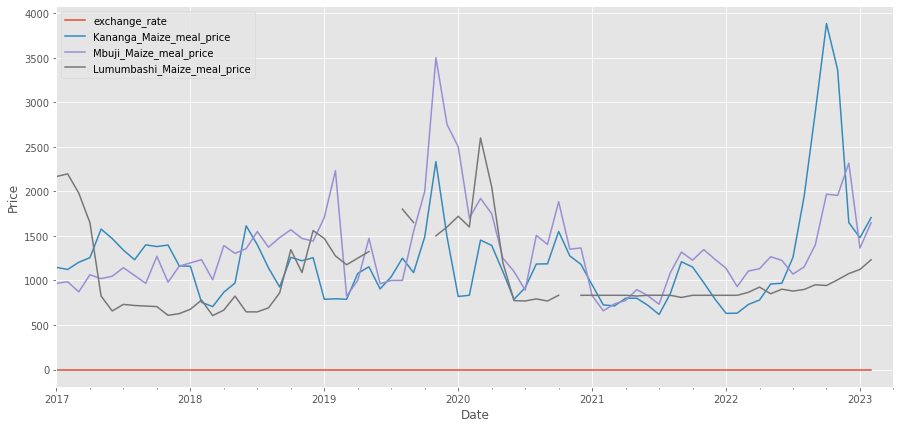

In [12]:
plt.rcParams['figure.figsize']=(15,7)
style.use('ggplot')
df.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

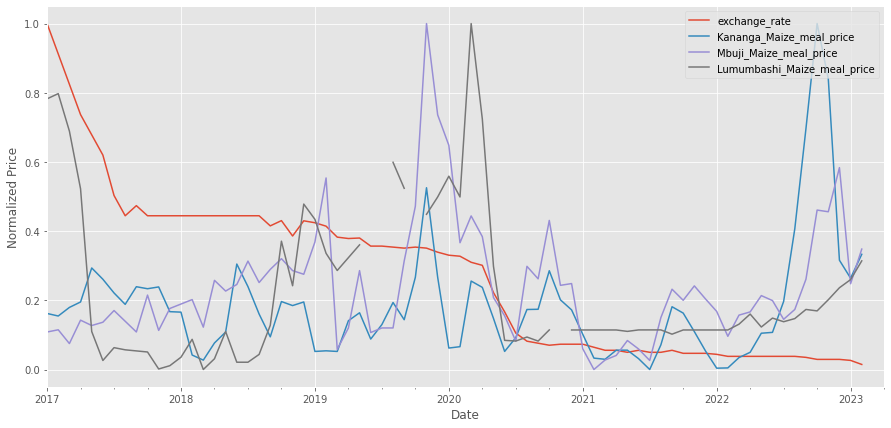

In [17]:
#Normalization can mislead since we don't have info about the scale or the values domain 
df_min_max_scaled = df.copy()
for column in df:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
df_min_max_scaled.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.show()

In [13]:
continuous_features = [feature for feature in df_g.columns if df_g[feature].dtypes != 'O']
print(continuous_features)

['exchange_rate', 'Kananga_Maize_Grain_price', 'Mbuji_Maize_Grain_price', 'Kinshasa_Maize_Grain_price']


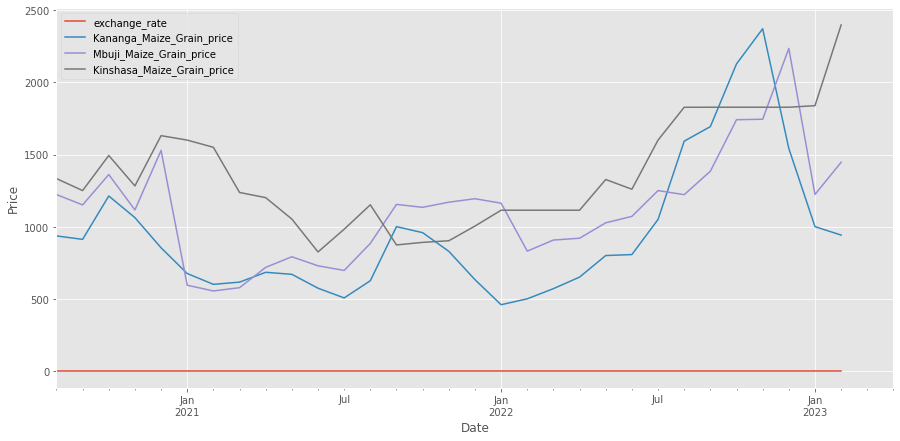

In [14]:
style.use('ggplot')
df_g.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [10]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC', regression='c')
    result = pd.Series(dftest[0:4], index=['Test Statistic','P-value','Lags Used','No of Observations'])
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result

In [83]:
#['exchange_rate', 'Kananga_Maize_Grain_price', 'Mbuji_Maize_Grain_price', 'Kinshasa_Maize_Grain_price']

#maize_meal[['exchange_rate']].fillna(value='NA').to_csv('maize_meal.csv', index=False)
maize_meal[['Kananga_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_ka.csv', index=False)
maize_meal[['Mbuji_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_mbu.csv', index=False)
maize_meal[['Lumumbashi_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_ki.csv', index=False)

In [11]:
# imputed missing values using Kalman smoothing
maize_meal_1=pd.read_csv('rate.csv')
maize_meal_2=pd.read_csv('ka.csv')
maize_meal_3=pd.read_csv('mbu.csv')
maize_meal_4=pd.read_csv('ki.csv')
maize_meal=pd.concat([maize_meal[['period_date']], maize_meal_1, maize_meal_2, maize_meal_3, maize_meal_4], axis=1)

In [86]:
adf_table = maize_meal.drop(['period_date', 'Unnamed: 0'], axis = 1)
adf_table.apply(adf_test, axis = 0)

,exchange_rate,Kananga_Maize_meal_price,Mbuji_Maize_meal_price,Lumumbashi_Maize_meal_price
Test Statistic,-1.411594,-2.661712,-3.536670,-2.676500
P-value,0.576706,0.080901,0.007094,0.078194
Lags Used,3.000000,2.000000,0.000000,0.000000
No of Observations,72.000000,73.000000,75.000000,75.000000
Critical Value (1%),-3.524624,-3.523284,-3.520713,-3.520713
Critical Value (5%),-2.902607,-2.902031,-2.900925,-2.900925
Critical Value (10%),-2.588679,-2.588371,-2.587781,-2.587781


In [12]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [100]:
adf_table = maize_meal.drop(['period_date', 'Unnamed: 0'], axis = 1)
adf_table.apply(kpss_test, axis = 0)

Results of KPSS Test:
Test Statistic           1.287593
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.248938
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.141985
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.12595
p-value                  0.10000
Lags Used                4.00000
Critical Value (10%)     0.34700
Critical Value (5%)  

c:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
c:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the 

exchange_rate                  None
Kananga_Maize_meal_price       None
Mbuji_Maize_meal_price         None
Lumumbashi_Maize_meal_price    None
dtype: object

exchange_rate: Non_stationary \
Kananga_Maize_meal_price: Non-stationary (ADF), stationary(KPSS)....trend stationary. Need to detrend \
Mbuji_Maize_meal_price: Stationary,\
Lumumbashi_Maize_meal_price: Non-stationary (ADF), stationary(KPSS)....trend stationary. Need to detrend

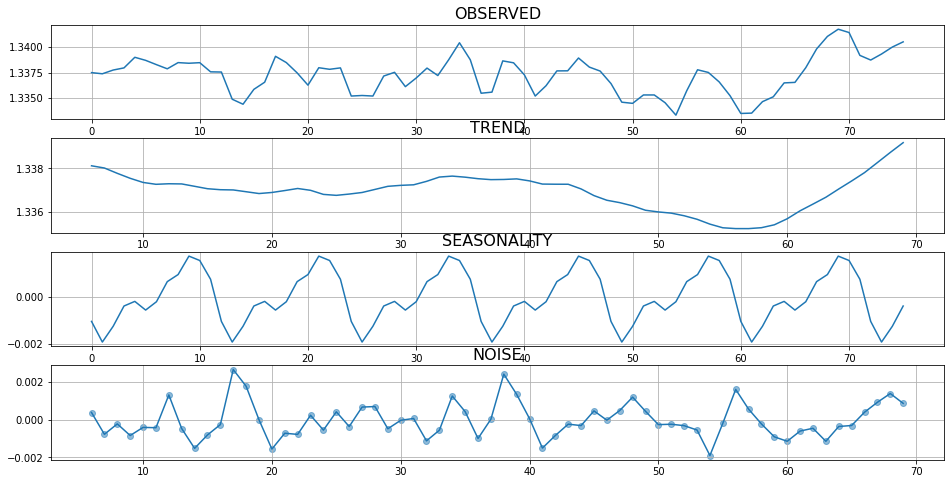

In [14]:
res = seasonal_decompose(maize_meal['Kananga_Maize_meal_price_box'].values, period=12)
    
observed = res.observed
trend = res.trend
seasonal = res.seasonal
residual = res.resid
    
#plot the complete time series
fig, axs = plt.subplots(4, figsize=(16,8))
axs[0].set_title('OBSERVED', fontsize=16)
axs[0].plot(observed)
axs[0].grid()
    
#plot the trend of the time series
axs[1].set_title('TREND', fontsize=16)
axs[1].plot(trend)
axs[1].grid()
    
#plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
axs[2].set_title('SEASONALITY', fontsize=16)
axs[2].plot(seasonal)
axs[2].grid()
    
#plot the noise of the time series
axs[3].set_title('NOISE', fontsize=16)
axs[3].plot(residual)
axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
axs[3].grid()
    
plt.show()

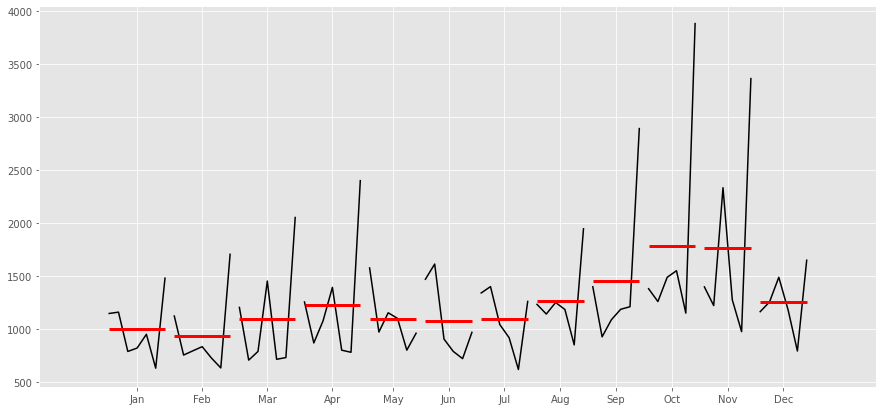

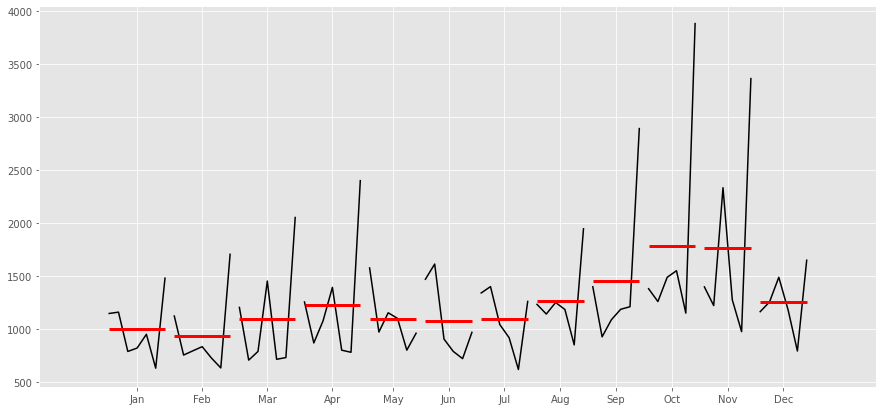

In [62]:
dff=maize_meal.drop('Unnamed: 0', axis=1)[['period_date', 'Kananga_Maize_meal_price']]
dff=dff.set_index('period_date')
dates=pd.to_datetime(dff.index.values)
dff.index = pd.DatetimeIndex(dates, freq='M')
month_plot(dff)

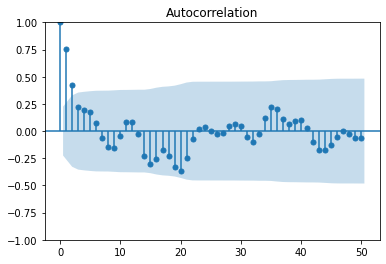

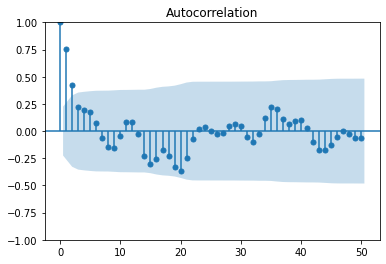

In [30]:
plot_acf(maize_meal['Kananga_Maize_meal_price_box'].values, lags=50)

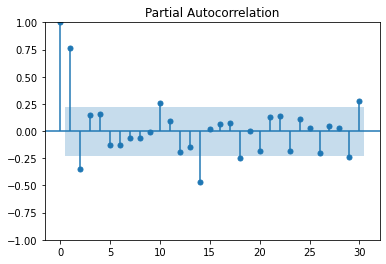

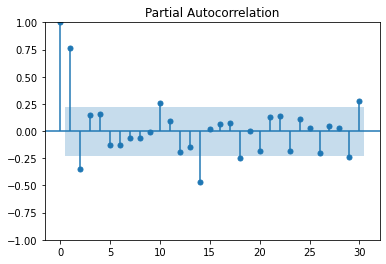

In [33]:
plot_pacf(maize_meal['Kananga_Maize_meal_price_box'].values, lags=30)

<Axes: >

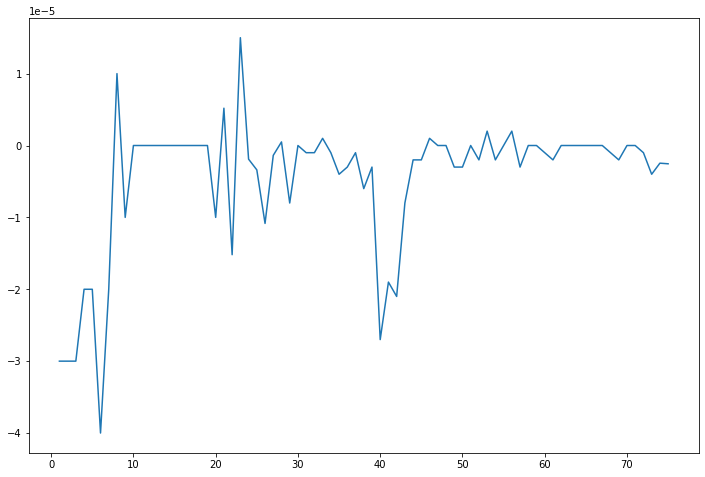

In [34]:
#maize_meal['Lumumbashi_Maize_meal_price_diff'] = maize_meal['Lumumbashi_Maize_meal_price'] - maize_meal['Lumumbashi_Maize_meal_price'].shift(1)
maize_meal['exchange_rate_diff'].dropna().plot(figsize=(12, 8))
#maize_meal['exchange_rate_diff'] = maize_meal['exchange_rate'] - maize_meal['exchange_rate'].shift(1)



In [14]:
maize_meal['exchange_rate_box'] = boxcox(maize_meal['exchange_rate'])[0]
maize_meal['Lumumbashi_Maize_meal_price_box'] = boxcox(maize_meal['Lumumbashi_Maize_meal_price'])[0]

<Axes: >

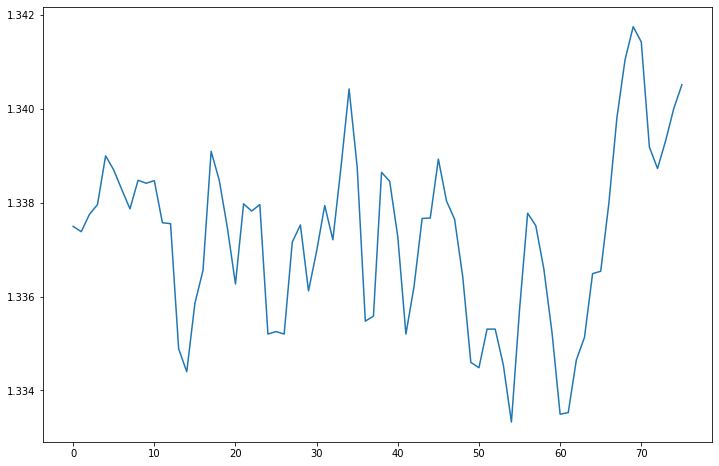

In [15]:
maize_meal['Kananga_Maize_meal_price_box'] = boxcox(maize_meal['Kananga_Maize_meal_price'])[0]
maize_meal['Kananga_Maize_meal_price_box'].plot(figsize=(12, 8))

In [36]:
adf_test(maize_meal['exchange_rate_diff'].dropna())

Test Statistic          -3.958891
P-value                  0.001642
Lags Used                2.000000
No of Observations      72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64

In [33]:
kpss_test(maize_meal['exchange_rate_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.425525
p-value                  0.066153
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [37]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_ielts = ccf_values(maize_meal['Kananga_Maize_meal_price_box'], maize_meal['exchange_rate_diff'])
ccf_ielts

array([ 0.00036289,  0.00057015,  0.00104552,  0.00253302,  0.00510673,
        0.0077854 ,  0.0089975 ,  0.01275522,  0.01754141,  0.02144397,
        0.02237155,  0.02446618,  0.02790532,  0.02850197,  0.02435284,
        0.02532667,  0.02188608,  0.01875982,  0.01469923,  0.01465466,
        0.01796214,  0.02169101,  0.02089694,  0.01557672,  0.01262268,
        0.0117002 ,  0.01553553,  0.01494603,  0.01228012,  0.00125935,
       -0.00120774,  0.00588528,  0.00173815, -0.00824229, -0.00268624,
       -0.02091677, -0.0291788 , -0.04627976, -0.04245027, -0.0471625 ,
       -0.0496985 , -0.05657731, -0.05430277, -0.05401987, -0.04191254,
       -0.01701696,  0.04570387,  0.08592952,  0.10658413,  0.0789198 ,
        0.02972569, -0.01303714, -0.04909507, -0.036703  , -0.03235173,
       -0.03142798, -0.04098532, -0.02366357, -0.00798111,  0.04286699,
        0.03375894,  0.00260761,  0.00656751, -0.03576462, -0.03712255,
       -0.10882077, -0.1307378 , -0.14279621, -0.15348071, -0.08

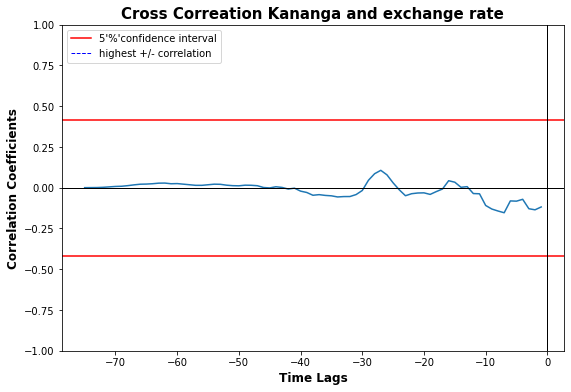

In [38]:
lags = signal.correlation_lags(len(maize_meal['Kananga_Maize_meal_price_box']), len(maize_meal['exchange_rate_diff']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label="5'%'confidence interval")
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation Kananga and exchange rate', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_ielts)

# Modeling

In [27]:
#!pip install pmdarima --quiet
import pmdarima as pm
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import normaltest

In [28]:
maize_meal['period_date']=pd.to_datetime(maize_meal['period_date'])
dfm=maize_meal.drop('Unnamed: 0', axis=1).set_index('period_date')

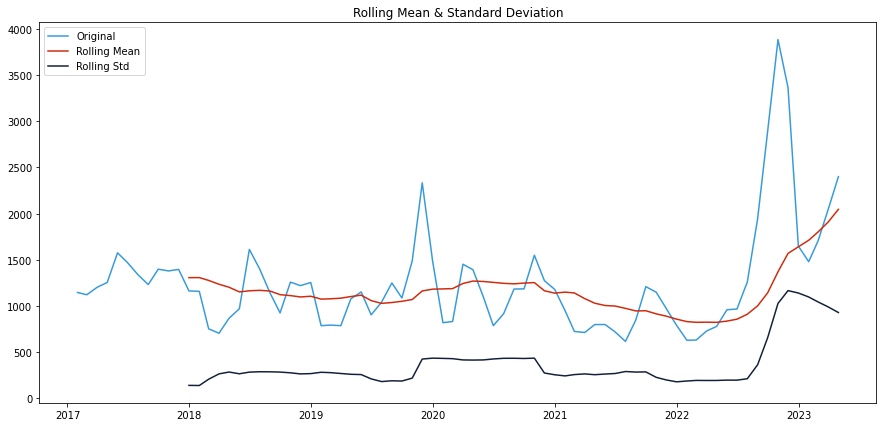

In [29]:
#Determine rolling statistics
dfm["rolling_avg"] = dfm["Kananga_Maize_meal_price"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
dfm["rolling_std"] = dfm["Kananga_Maize_meal_price"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(dfm["Kananga_Maize_meal_price"], color='#379BDB', label='Original')
plt.plot(dfm["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(dfm["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=True)

In [30]:
class expanding_window(object):
    '''	
    Parameters 
    ----------
    
    Note that if you define a horizon that is too far, then subsequently the split will ignore horizon length 
    such that there is validation data left. This similar to Prof Rob hyndman's TsCv 
    
    
    initial: int
        initial train length 
    horizon: int 
        forecast horizon (forecast length). Default = 1
    period: int 
        length of train data to add each iteration 
    '''
    

    def __init__(self,initial= 1,horizon = 1,period = 1):
        self.initial = initial
        self.horizon = horizon 
        self.period = period 


    def split(self,data):
        '''
        Parameters 
        ----------
        
        Data: Training data 
        
        Returns 
        -------
        train_index ,test_index: 
            index for train and valid set similar to sklearn model selection
        '''
        self.data = data
        self.counter = 0 # for us to iterate and track later 


        data_length = data.shape[0] # rows 
        data_index = list(np.arange(data_length))
         
        output_train = []
        output_test = []
        # append initial 
        output_train.append(list(np.arange(self.initial)))
        progress = [x for x in data_index if x not in list(np.arange(self.initial)) ] # indexes left to append to train 
        output_test.append([x for x in data_index if x not in output_train[self.counter]][:self.horizon] )
        # clip initial indexes from progress since that is what we are left 
         
        while len(progress) != 0:
            temp = progress[:self.period]
            to_add = output_train[self.counter] + temp
            # update the train index 
            output_train.append(to_add)
            # increment counter 
            self.counter +=1 
            # then we update the test index 
            
            to_add_test = [x for x in data_index if x not in output_train[self.counter] ][:self.horizon]
            output_test.append(to_add_test)

            # update progress 
            progress = [x for x in data_index if x not in output_train[self.counter]]	
            
        # clip the last element of output_train and output_test
        output_train = output_train[:-1]
        output_test = output_test[:-1]
        
        # mimic sklearn output 
        index_output = [(train,test) for train,test in zip(output_train,output_test)]
        
        return index_output

In [79]:
X=dfm.head(72)[['Kananga_Maize_meal_price']]
Y=dfm.tail(4)[['Kananga_Maize_meal_price']]

In [90]:
#X['Kananga_Maize_meal_price']
#k2, p=normaltest(X['Kananga_Maize_meal_price'].values)

2.1049790057167058e-14

In [81]:
tscv = expanding_window(initial = 60, horizon = 4,period = 1)

In [85]:
help(sm.tsa.SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs)
 |  
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA p

In [ ]:
rmse = []
for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    
    arma = sm.tsa.SARIMAX(cv_train, (2,2)).fit(disp=False)
    
    predictions = arma.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
print("RMSE: {}".format(np.mean(rmse)))

In [75]:
for train_index, test_index in tscv.split(X):
    print(train_index)
    print(test_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1

In [ ]:

tscv = expanding_window(initial = 36, horizon = 24,period = 1)
for train_index, test_index in tscv.split(X):
    print(train_index)
    print(test_index)

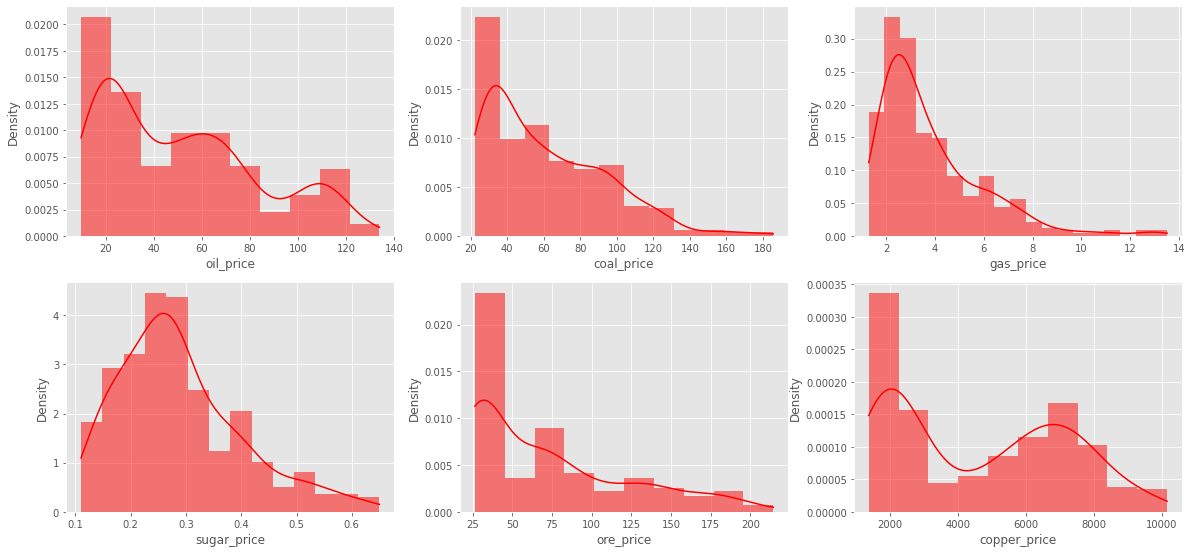

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.histplot(df[feature], color = "red", kde = True, stat = "density", linewidth = 0)
    plotnumber+=1
plt.show()

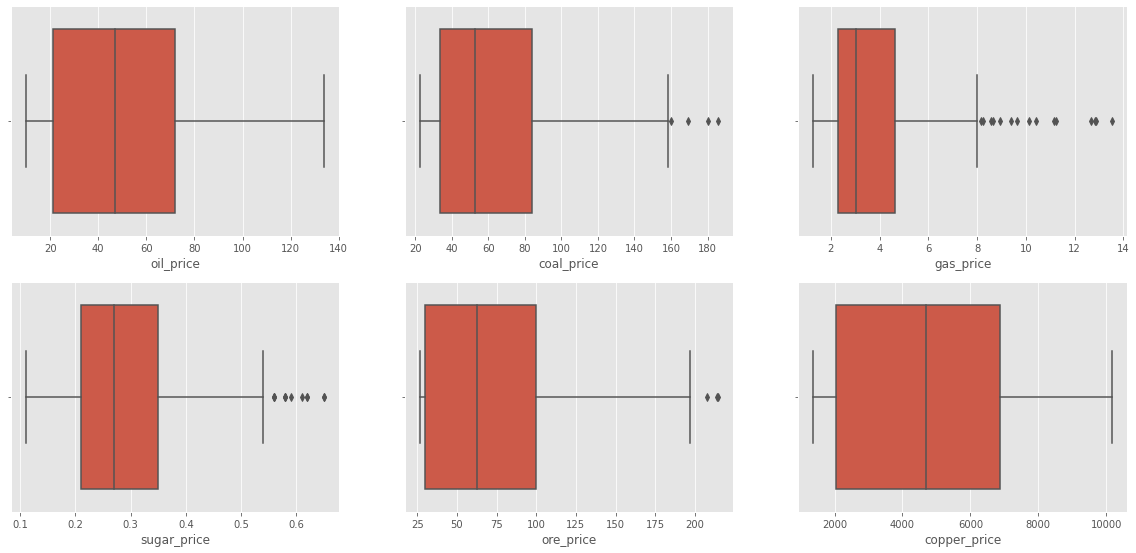

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x = df[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

# Selecting Best Model

In [ ]:
def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'DecisionTreeRegressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 130],
                'criterion': ['squared_error'],
                'max_depth': range(2, 4, 1),
                'max_features': ['auto','log2']
            }
        },
        'XGBRegressor': {
            'model': XGBRegressor(),
            'params': {
                'objective': ['reg:squarederror'],
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [2, 3],
                'n_estimators': [10, 50, 100, 200]
            }
        },
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {}
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],cv = cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

# Price Predictions by Combined Dataset

In [ ]:
target = 'oil_price' #oil_price, coal_price, gas_price, sugar_price, ore_price, copper_price

In [ ]:
print(cor_mat[target])

oil_price       1.000000
coal_price      0.820015
gas_price       0.381916
sugar_price     0.697577
ore_price       0.855380
copper_price    0.886648
Name: oil_price, dtype: float64


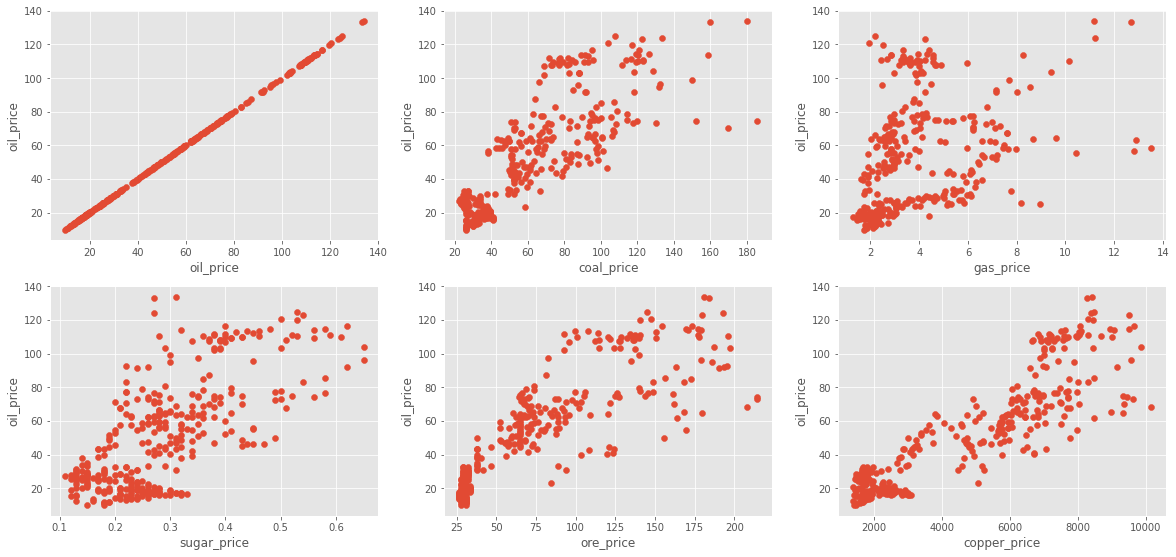

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(df[feature], df[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plotnumber+=1
plt.show()

In [ ]:
df['Y'] = df[target].shift(-forecast_out)
df

,oil_price,coal_price,gas_price,sugar_price,ore_price,copper_price,Y
Month,,,,,,,
1992-03-01,17.60,39.50,1.28,0.18,33.10,2227.33,20.25
1992-04-01,18.95,39.50,1.47,0.21,33.10,2215.33,19.75
1992-05-01,19.90,39.50,1.59,0.21,33.10,2216.52,20.25
1992-06-01,21.15,39.50,1.56,0.23,33.10,2299.20,20.30
1992-07-01,20.25,39.50,1.75,0.23,33.10,2520.32,19.20
...,...,...,...,...,...,...,...
2021-05-01,68.04,107.04,2.89,0.38,207.72,10161.97,74.60
2021-06-01,73.07,129.97,3.24,0.38,214.43,9631.50,NaN
2021-07-01,74.39,151.97,3.80,0.39,214.14,9450.82,NaN


In [ ]:
X = np.array(df.drop(['Y'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[-1.0461089 , -0.66305104, -1.18736146, -0.96477291, -0.79982726,
        -0.94164386],
       [-1.00440263, -0.66305104, -1.09854406, -0.69830944, -0.79982726,
        -0.94636024],
       [-0.97505378, -0.66305104, -1.04244887, -0.69830944, -0.79982726,
        -0.94589254],
       ...,
       [ 0.42411422,  1.03055497, -0.58901271,  0.45636561,  1.93427589,
         1.71561446],
       [ 0.41113894,  0.94804439, -0.56563971,  0.63400792,  2.17007913,
         1.84789726],
       [ 0.51216078,  1.40093578, -0.43475093,  0.81165024,  2.73459006,
         2.17692405]])

In [ ]:
y = np.array(df['Y'])
y = y[:-forecast_out]
y

array([ 20.25,  19.75,  20.25,  20.3 ,  19.2 ,  18.15,  17.4 ,  18.45,
        18.75,  18.65,  18.5 ,  17.65,  16.8 ,  16.7 ,  16.  ,  16.6 ,
        15.15,  13.6 ,  14.25,  13.8 ,  13.95,  15.15,  16.2 ,  16.75,
        17.6 ,  16.8 ,  15.9 ,  16.4 ,  17.2 ,  15.96,  16.63,  17.08,
        17.01,  18.67,  18.38,  17.35,  15.86,  16.07,  16.78,  16.12,
        16.88,  17.96,  17.94,  17.97,  19.99,  21.01,  19.12,  18.27,
        19.61,  20.58,  22.59,  24.18,  22.64,  23.9 ,  23.47,  20.83,
        19.21,  17.47,  19.14,  17.55,  18.4 ,  18.71,  18.45,  19.85,
        19.  ,  17.  ,  15.09,  14.06,  13.08,  13.39,  14.39,  12.06,
        12.01,  11.88,  13.36,  12.56,  10.92,   9.8 ,  11.06,  10.2 ,
        12.47,  15.3 ,  15.14,  15.77,  19.01,  20.22,  22.4 ,  21.95,
        24.59,  25.59,  25.38,  27.7 ,  27.47,  22.54,  27.34,  29.68,
        28.53,  29.43,  32.62,  30.93,  32.52,  25.13,  25.64,  27.41,
        24.4 ,  25.64,  28.45,  27.72,  24.54,  25.7 ,  25.54,  20.48,
      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,DecisionTreeRegressor,0.915205,"{'criterion': 'squared_error', 'splitter': 'best'}"
1,RandomForestRegressor,0.903620,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}"
2,XGBRegressor,0.940797,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}"
3,LinearRegression,0.856345,{}


In [ ]:
clf = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 200, objective = 'reg:squarederror')
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9607251677811108


In [ ]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan
forecast_set

array([83.33231 , 60.84204 , 58.734276, 61.01791 ], dtype=float32)

In [ ]:
for i in forecast_set:
    next_date = df.iloc[-1].name + relativedelta(months=1)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [ ]:
df

,oil_price,coal_price,gas_price,sugar_price,ore_price,copper_price,Y,Forecast
Month,,,,,,,,
1992-03-01,17.60,39.50,1.28,0.18,33.10,2227.33,20.25,NaN
1992-04-01,18.95,39.50,1.47,0.21,33.10,2215.33,19.75,NaN
1992-05-01,19.90,39.50,1.59,0.21,33.10,2216.52,20.25,NaN
1992-06-01,21.15,39.50,1.56,0.23,33.10,2299.20,20.30,NaN
1992-07-01,20.25,39.50,1.75,0.23,33.10,2520.32,19.20,NaN
...,...,...,...,...,...,...,...,...
2021-09-01,74.60,185.69,5.11,0.43,124.52,9324.71,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.332314
2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.842041


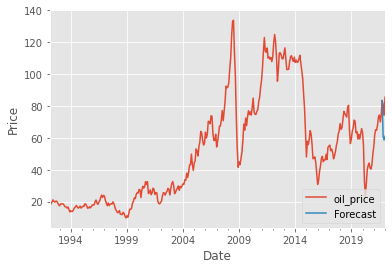

In [ ]:
odf[target].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

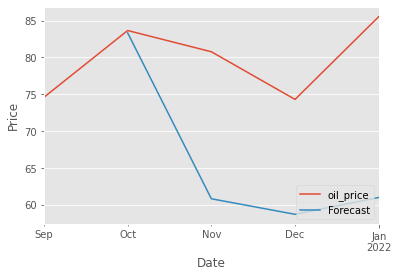

In [ ]:
odf.tail(forecast_out+1)[target].plot()
df.tail(forecast_out)['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
print(df['Forecast'])

Month
1992-03-01          NaN
1992-04-01          NaN
1992-05-01          NaN
1992-06-01          NaN
1992-07-01          NaN
                ...    
2021-09-01          NaN
2021-10-01    83.332314
2021-11-01    60.842041
2021-12-01    58.734276
2022-01-01    61.017910
Name: Forecast, Length: 359, dtype: float64


In [ ]:
print(odf[target])

Month
1992-03-01    17.60
1992-04-01    18.95
1992-05-01    19.90
1992-06-01    21.15
1992-07-01    20.25
              ...  
2021-09-01    74.60
2021-10-01    83.65
2021-11-01    80.77
2021-12-01    74.31
2022-01-01    85.53
Name: oil_price, Length: 359, dtype: float64
